In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(lactation)

In [3]:
str(lactation)

'data.frame':	35 obs. of  2 variables:
 $ Yield: num  0.31 0.39 0.5 0.58 0.59 0.64 0.68 0.66 0.67 0.7 ...
 $ Week : int  1 2 3 4 5 6 7 8 9 10 ...


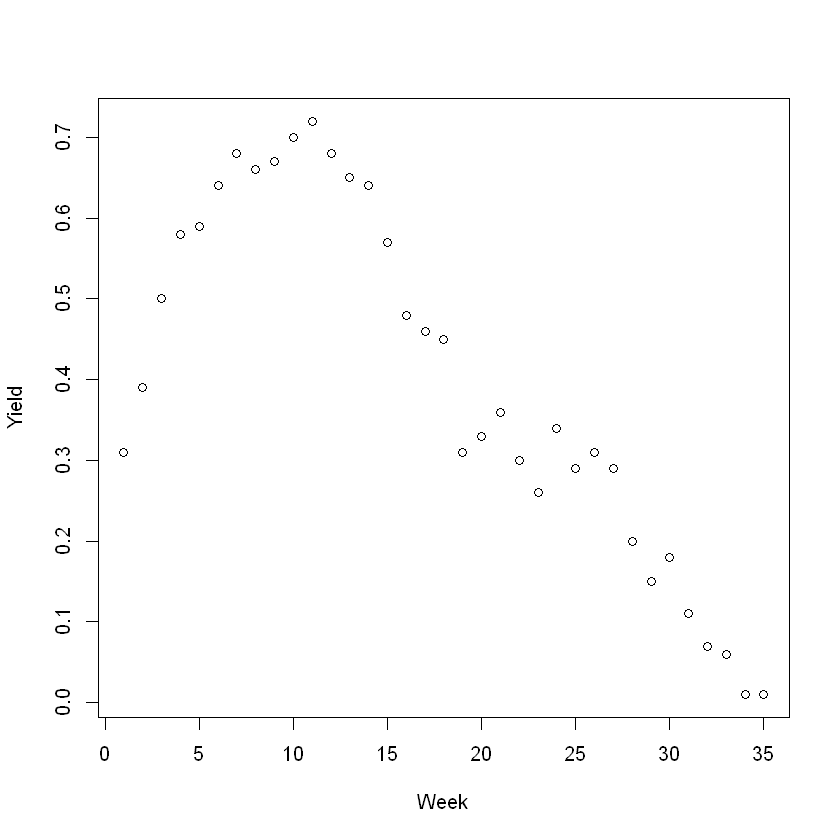

In [4]:
plot(Yield ~ Week, data=lactation)

In [5]:
glm.1 <- glm(Yield ~  Week + I(1/Week), data=lactation, family = Gamma(link="log"))

In [6]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.76924628,0.192379828,3.998581,3.516335e-04
Week,-0.09023936,0.007982168,-11.305119,1.038176e-12
I(1/Week),-2.20359562,0.449562640,-4.901643,2.644263e-05


In [7]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,34,21.679610,NA,NA
Week,1,10.830827,33,10.848783,78.20295,4.194486e-10
I(1/Week),1,2.908384,32,7.940399,20.99971,6.657046e-05


In [9]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 0.9999955

[1] 1

[1] 0.2481375

[1] 0.1384964


	Shapiro-Wilk normality test

data:  qr1
W = 0.81402, p-value = 3.889e-05


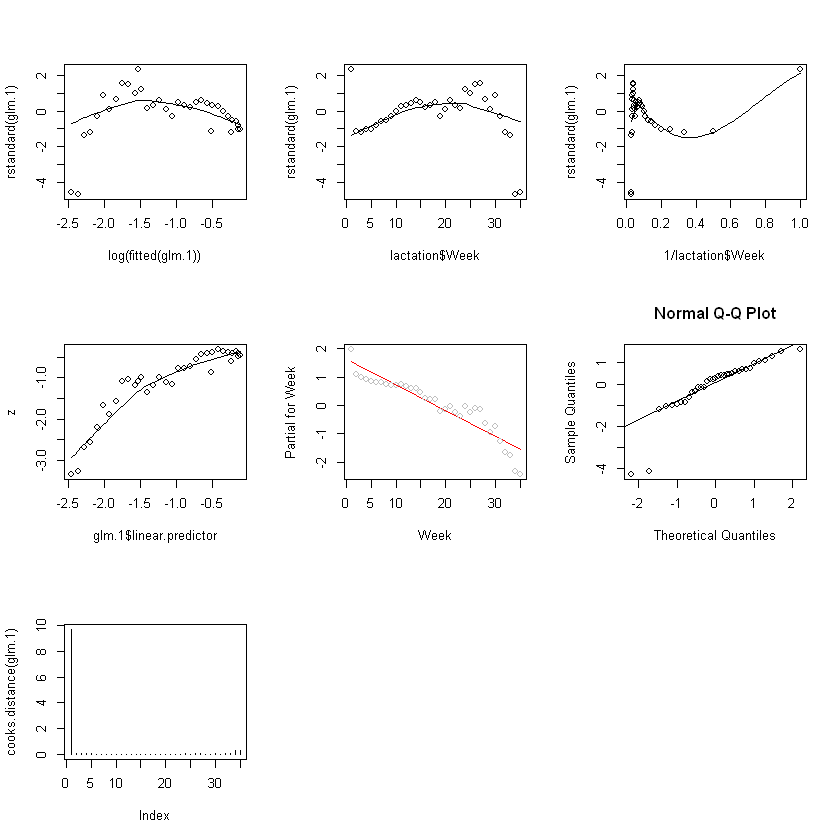

In [15]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ lactation$Week)
scatter.smooth(rstandard(glm.1) ~ 1/lactation$Week)
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
termplot(glm.1, partial.resid = TRUE, terms="Week")
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)

In [16]:
glm.2 <- glm(Yield ~ I(log(Week)) + Week, data=lactation, family = Gamma(link="log"))

In [17]:
coef(summary(glm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.3859636,0.24259060,-5.713180,2.494071e-06
I(log(Week)),1.1680544,0.17048024,6.851553,9.458539e-08
Week,-0.1572424,0.01435981,-10.950175,2.350590e-12


In [18]:
anova(glm.2, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,34,21.679610,NA,NA
I(log(Week)),1,4.606244,33,17.073366,39.27394,5.023592e-07
Week,1,10.905701,32,6.167665,92.98462,5.477643e-11


In [19]:
gof.dev <- deviance(glm.2)
gof.pearson <- sum(glm.2$weights * glm.2$residuals^2)

pchisq(gof.dev, df=df.residual(glm.2), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.2), lower.tail = FALSE)

gof.dev / df.residual(glm.2)
gof.pearson / df.residual(glm.2)

[1] 0.9999998

[1] 1

[1] 0.1927395

[1] 0.117285


	Shapiro-Wilk normality test

data:  qr2
W = 0.77325, p-value = 6.358e-06


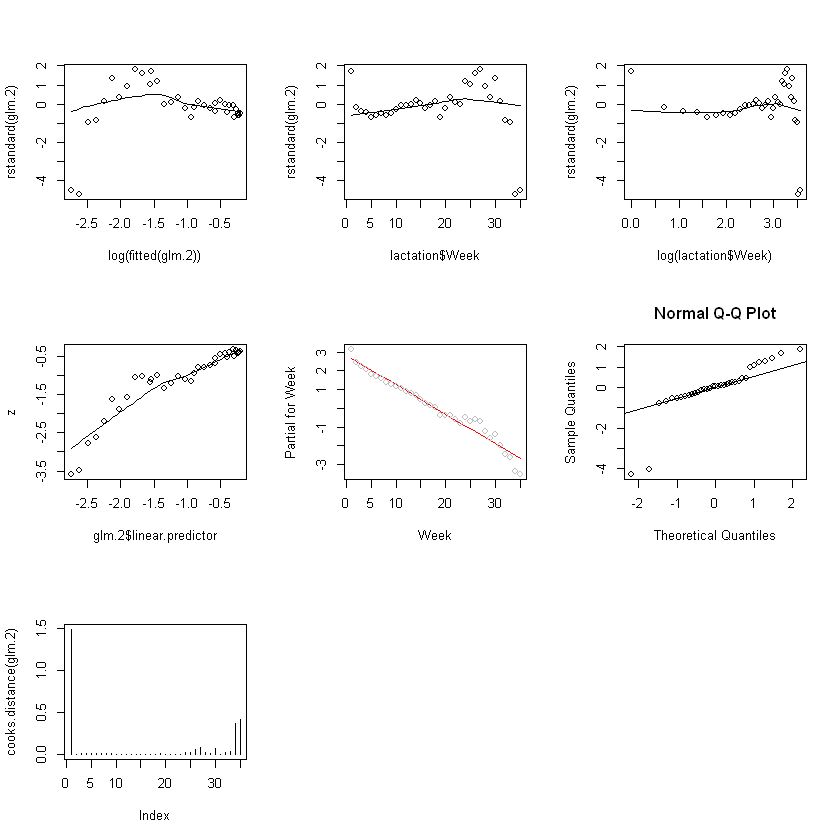

In [20]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.2) ~ log(fitted(glm.2)))
scatter.smooth(rstandard(glm.2) ~ lactation$Week)
scatter.smooth(rstandard(glm.2) ~ log(lactation$Week))
z <- resid(glm.2, type="working") + glm.2$linear.predictor
scatter.smooth(z ~ glm.2$linear.predictor)
termplot(glm.2, partial.resid = TRUE, terms="Week")
qqnorm(qr2 <- qresid(glm.2))
qqline(qr2)
plot(cooks.distance(glm.2), type="h")
shapiro.test(qr2)

In [21]:
extractAIC(glm.1); extractAIC(glm.2)

[1]   3.00000 -29.34201

[1]   3.0000 -38.4788

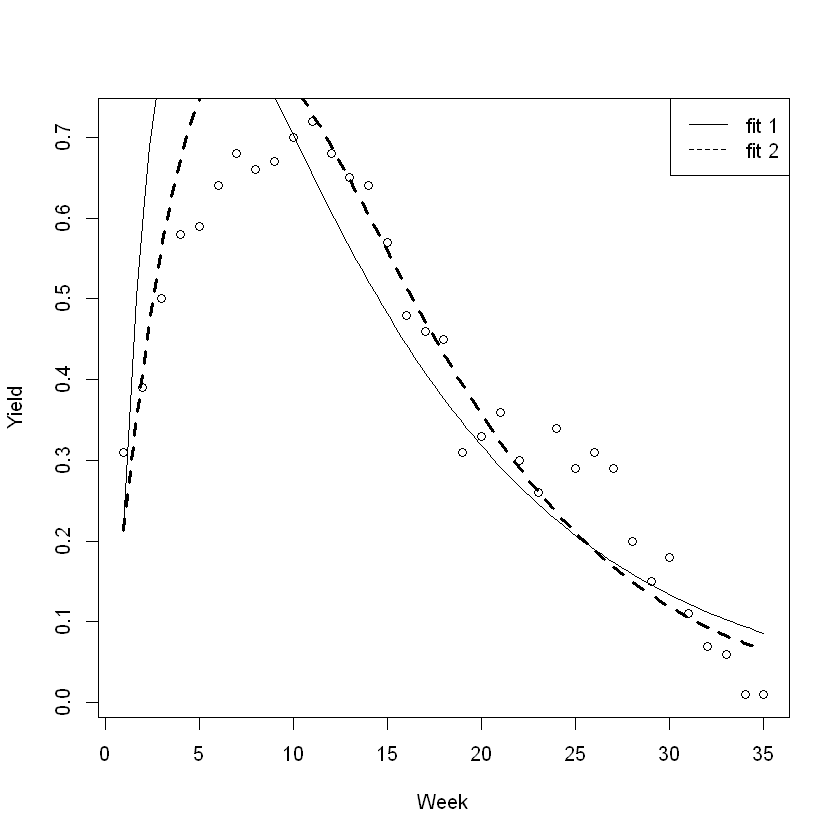

In [26]:
newWeek = seq(min(lactation$Week), max(lactation$Week), length=100)
fit.1 <- predict(glm.1, newdata=data.frame(Week=newWeek), type="response")
fit.2 <- predict(glm.2, newdata=data.frame(Week=newWeek), type="response")

plot(Yield ~ Week, data=lactation)
lines(fit.1 ~ newWeek, lty=1, lwd=1)
lines(fit.2 ~ newWeek, lty=2, lwd=3)
legend("topright", lty=c(1, 2), legend=c("fit 1", "fit 2"))